<a href="https://colab.research.google.com/github/shauryapanhale/skill2/blob/main/SKILL_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS MY LCA 3:
I AM USING THE BOT-IOT DATASET AND IMPLEMENTING DATA SCIENCE EXPERIMENTS ON IT
THIS IS A MICRO PROJECT

step 1: firstly i am ignoring the warnings for my entire project

In [78]:
import warnings
warnings.filterwarnings("ignore")

step 2: let me import my neccassary libraries first

In [79]:
import pandas as pd
import os

step 3: now i will implement my four csv files

In [80]:
csv_files = [
    '/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

step 4: let me load and concatenate my dataset

In [81]:
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

step 5: lets print all the rows

In [82]:
print("Total rows after concatenation:", len(df))

Total rows after concatenation: 3668522


I WILL CHOOSE SUBCATEGORY AS MY TARGET VARIABLE

NOW I HAVE TO ENCODE MY TARGET VARAIBLE SO THAT I CAN FIND OUT THE COUNT OF EACH CLASSES

step 1: first le me import the label encoder library

In [83]:
from sklearn.preprocessing import LabelEncoder

step 2: first let me drop rows with missing columns

In [84]:
df = df.dropna(subset=['subcategory'])

steo 3: now lets actually encode the target

In [85]:
le = LabelEncoder()
df['subcategory_encoded'] = le.fit_transform(df['subcategory'])

steo 4: now lets take the count of each class

In [86]:
subcat_counts = df['subcategory'].value_counts()
print("These are the classes count after encoding:\n", df['subcategory'].value_counts())

These are the classes count after encoding:
 subcategory
UDP                  1981230
TCP                  1593180
Service_Scan           73168
OS_Fingerprint         17914
HTTP                    2474
Normal                   477
Keylogging                73
Data_Exfiltration          6
Name: count, dtype: int64


step 6: The column Keylogging and Data_Extraction are very less so we can directly drop it

In [87]:
rare_classes = subcat_counts[subcat_counts < 100].index
df = df[~df['subcategory'].isin(rare_classes)]

steo 7: now lets print the counts again

In [88]:
print("Remaining classes after removing rare ones:\n", df['subcategory'].value_counts())

Remaining classes after removing rare ones:
 subcategory
UDP               1981230
TCP               1593180
Service_Scan        73168
OS_Fingerprint      17914
HTTP                 2474
Normal                477
Name: count, dtype: int64


I HAVE THE COUNT, LETS VISUALIZE IT TO UNDERSTAND IT CLEARER (BAR PLOT)

step 1: importing libraries

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

step 2: lets plot the bar plot now

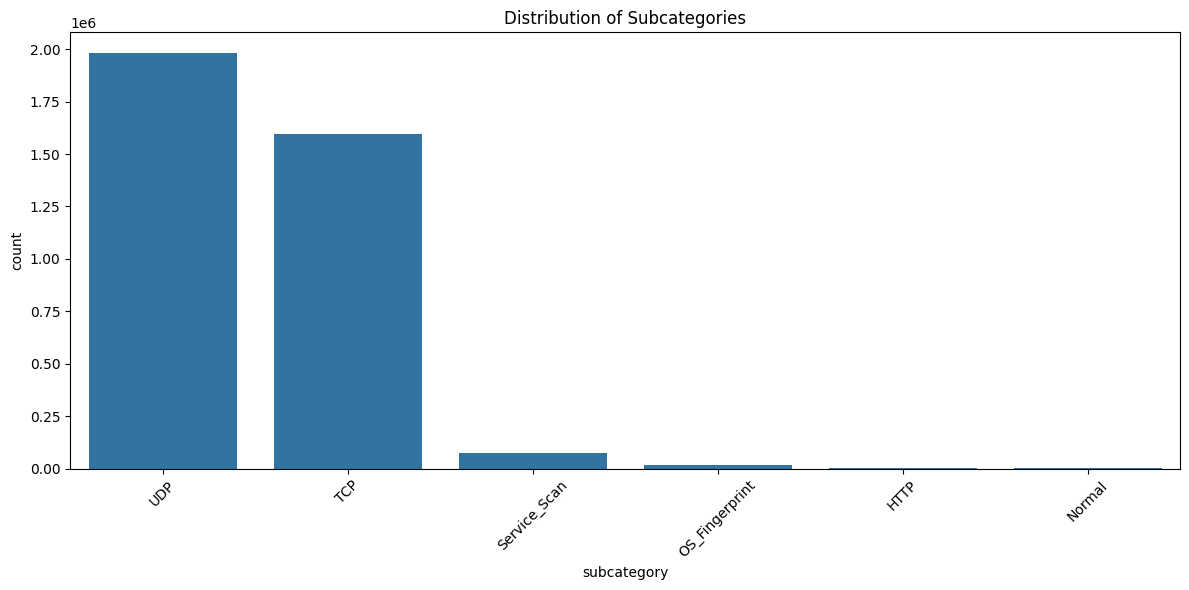

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subcategory', order=df['subcategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Subcategories')
plt.tight_layout()
plt.show()

NOW THE THING IS THAT I HAVE TO REDUCE AND RESMAPLE THE DATASET INTO AROUND 1 LAKH ENTRIES BUT IN THIS ACCORDINT TO THE BAR PLOT, I UNDERSTOOD THAT HTTP AND NORMAL IS VERY LESS SO I WILL DIRECTLY INPUT THAT IN THE NEW DATASET, AND FOR THE REST I WILL RESAMPLE AND MAKE THE NEW DATASET

step 1: lets first decide the total size of the dataset

In [91]:
final_size = 101010

step 2: lets get the subcategory count again

In [92]:
counts = df['subcategory'].value_counts()
print(counts)

subcategory
UDP               1981230
TCP               1593180
Service_Scan        73168
OS_Fingerprint      17914
HTTP                 2474
Normal                477
Name: count, dtype: int64


step 3: lets do one thing, lets split the classes into into majority and minority

In [93]:
minor_classes = counts[counts < (final_size // len(counts))].index
major_classes = counts[counts >= (final_size // len(counts))].index

steo 4: now i will keep all samples from minority classes

In [94]:
minor_df = df[df['subcategory'].isin(minor_classes)]

step 5: now i will remove these from the main 36 lakh dataset

In [95]:
remaining_quota = final_size - len(minor_df)

step 6: now i will actually do the resmapling without any proportion, i will balance later

In [96]:
major_df_list = []
for label in major_classes:
    class_df = df[df['subcategory'] == label]
    sample_size = int((counts[label] / counts[major_classes].sum()) * remaining_quota)
    major_df_list.append(class_df.sample(n=sample_size, random_state=42))

step 7: now i will combine the dataset

In [97]:
final_df = pd.concat([minor_df] + major_df_list, ignore_index=True)

step 8: lets shuffle the dataset

In [98]:
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

step 9: lets see the shape of this dataset

In [99]:
print("Final dataset shape:", final_df.shape)

Final dataset shape: (101008, 47)


step 10: now i will save the new dataset on which i will perform the rest of the operations

In [100]:
final_df.to_csv('bot_iot_100k.csv', index=False)
print("Final dataset saved as 'bot_iot_100k.csv'")

Final dataset saved as 'bot_iot_100k.csv'


NOW I HAVE GENERATED THE REDUCED DATASET, SO LETS START IMPLEMENTING DATA SCIENCE

In [101]:
df = pd.read_csv('/content/bot_iot_100k.csv')
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory,subcategory_encoded
0,144204,1.528081e+09,e g,5,tcp,1,192.168.100.150,23986,192.168.100.3,80,...,36,36,0.219287,0.184018,216,216,1,DoS,TCP,6
1,1077863,1.528085e+09,e,1,udp,3,192.168.100.150,26662,192.168.100.3,80,...,98,98,0.487158,0.482571,1176,1176,1,DoS,UDP,7
2,1556963,1.528085e+09,eU,6,udp,3,192.168.100.148,8422,192.168.100.6,80,...,63,63,0.277627,0.309863,441,441,1,DoS,UDP,7
3,802674,1.528085e+09,e,1,udp,3,192.168.100.150,51907,192.168.100.3,80,...,100,100,0.448832,0.448769,1100,1100,1,DoS,UDP,7
4,952338,1.528085e+09,e,1,udp,3,192.168.100.147,46500,192.168.100.7,80,...,100,100,0.441143,0.441034,1200,1200,1,DoS,UDP,7


I DONT THINK THIS DATASET NEEDS MUCH CLEANING BUT STILL FOR SFAETY I WILL DO IT

step 1: lets check weather there are any null values or not?

In [102]:
print(df.isnull().sum())

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

step 2: now there are no null values so lets drop duplicate values

In [103]:
df = df.drop_duplicates()

step 3: lets get the basic info of this dataset

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101008 entries, 0 to 101007
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pkSeqID                           101008 non-null  int64  
 1   stime                             101008 non-null  float64
 2   flgs                              101008 non-null  object 
 3   flgs_number                       101008 non-null  int64  
 4   proto                             101008 non-null  object 
 5   proto_number                      101008 non-null  int64  
 6   saddr                             101008 non-null  object 
 7   sport                             101008 non-null  object 
 8   daddr                             101008 non-null  object 
 9   dport                             101008 non-null  object 
 10  pkts                              101008 non-null  int64  
 11  bytes                             101008 non-null  i

I THINK THIS DATASET IS PRETTY MUCH CLEANED, NOW LETS PERFORM ENCODING ON THE REST NON-NUMERIC COLUMNS

step 1: lets find out the non-numeric columns

In [105]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:")
print(non_numeric_columns.tolist())

Non-numeric columns:
['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category', 'subcategory']


step 2: previously i have already encoded the subcategory which created a new column named as subcategory_encoded so i will first simply drop this column

In [106]:
df = df.drop(columns=['subcategory'])

step 4: now lets find out the non numeric columns again

In [107]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:")
print(non_numeric_columns.tolist())

Non-numeric columns:
['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category']


step 5: now lets encode these columns using label encoding

In [108]:
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    df[col] = label_encoder.fit_transform(df[col])

step 6: now lets print df to see the encoded dataset

In [109]:
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory_encoded
0,144204,1.528081e+09,4,5,3,1,4,12064,16,1353,...,0.219332,36,36,0.219287,0.184018,216,216,1,1,6
1,1077863,1.528085e+09,0,1,4,3,4,14367,16,1353,...,0.487158,98,98,0.487158,0.482571,1176,1176,1,1,7
2,1556963,1.528085e+09,6,6,4,3,2,50011,20,1353,...,0.278436,63,63,0.277627,0.309863,441,441,1,1,7
3,802674,1.528085e+09,0,1,4,3,4,36200,16,1353,...,0.448769,100,100,0.448832,0.448769,1100,1100,1,1,7
4,952338,1.528085e+09,0,1,4,3,1,31412,21,1353,...,0.441034,100,100,0.441143,0.441034,1200,1200,1,1,7


NOW FOR THIS NEW REDUCED DATASET, I WANT TO CHECK THE VALUE COUNTS FOR THE SUBCATEGORY COLUMN SO LETS FIND THAT OUT TO CHECK IF WE NEED BALANCING

In [110]:
subcat_counts = df['subcategory_encoded'].value_counts()
print("Remaining classes after removing rare ones:\n", df['subcategory_encoded'].value_counts())

Remaining classes after removing rare ones:
 subcategory_encoded
7    53001
6    42620
1     2474
5     1957
4      479
3      477
Name: count, dtype: int64


TO SEE THIS IN A BETTER WAY, LETS PLOT A BAR GRAPH FOR THIS

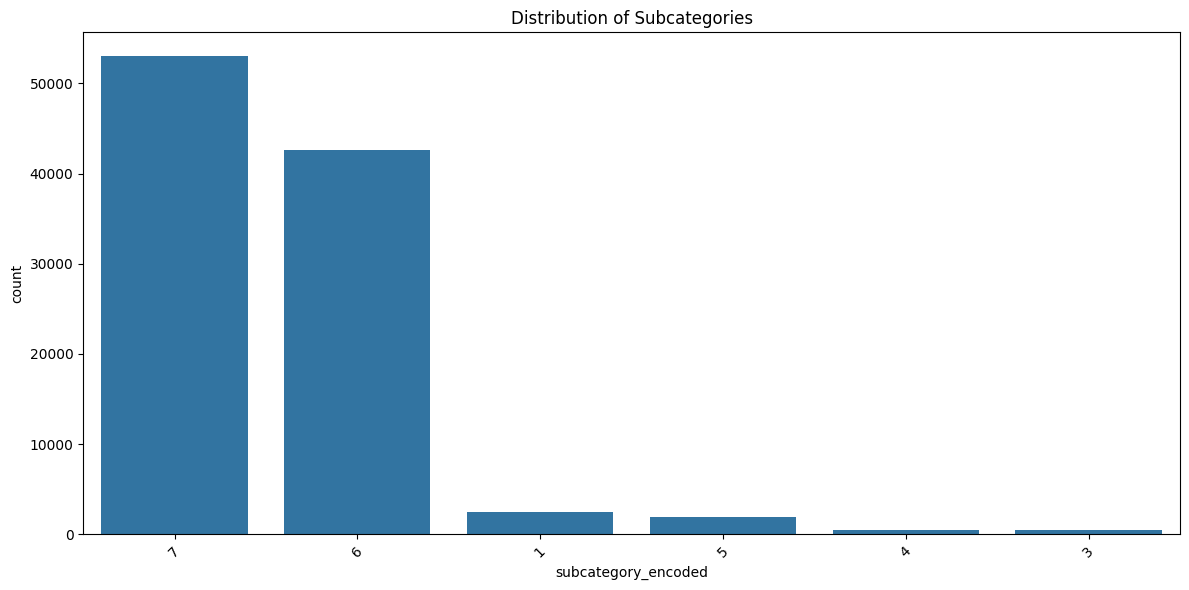

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subcategory_encoded', order=df['subcategory_encoded'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Subcategories')
plt.tight_layout()
plt.show()

THIS CLEARLY LOOKS LIKE IT IS NOT BALANCED AT ALL SO I MIGHT HAVE to USE SMOTE AND PERFORM OVERSAMPLING ON THIS

step 1: import the necessary libraries

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

step 2: lets seperate target and variables

In [114]:
X = df.drop(columns=['subcategory_encoded'])
y = df['subcategory_encoded']

step 3: first i think i need to handle missing values by replacing them with mean

In [115]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

step 4: lets split the data into testing and training dataset

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

step 5: now lets use smote using the training data

In [117]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

step 6: lets compare the value counts before and after using smote

In [118]:
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Before SMOTE:
subcategory_encoded
7    42400
6    34096
1     1979
5     1566
4      383
3      382
Name: count, dtype: int64

After SMOTE:
subcategory_encoded
6    42400
7    42400
4    42400
1    42400
3    42400
5    42400
Name: count, dtype: int64


step 7: now lets save this new balanced dataset into a new csv file

In [119]:
balanced_data = pd.concat([pd.DataFrame(X_train_balanced), pd.DataFrame(y_train_balanced, columns=['subcategory_encoded'])], axis=1)
balanced_data.to_csv('nice.csv', index=False)
print("\nBalanced training data saved to 'nice.csv'")


Balanced training data saved to 'nice.csv'


NOW TO LEARN AND UNDERSTAND THIS BALANCING, LETS VISUALIZE THIS DATASET BY PLOTTING A BAR GRAPH AGAIN

step 1: lets load the balanced csv

In [120]:
file_path = '/content/nice.csv'
balanced_data = pd.read_csv(file_path)

step 2: lets plot the graph

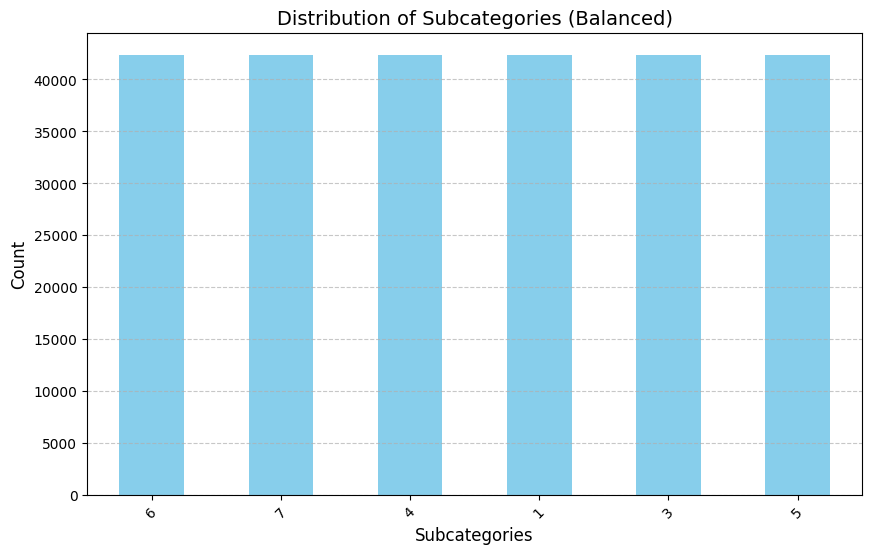

In [121]:
plt.figure(figsize=(10, 6))
balanced_data['subcategory_encoded'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Subcategories (Balanced)', fontsize=14)
plt.xlabel('Subcategories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NOW I WAS THINKING THAT DO WE NEED TO PERFORM NORMALIZATION ON THIS BUT FOR THAT LETS CHECK THE VARIANCE FOR ALL COLUMNS TO SEE THAT WHICH COLUMN NEEDS NORMALIZATION

TO SEE THE VARIANCE THE BEST WAY IS TO PLOT A BAR GRAPH

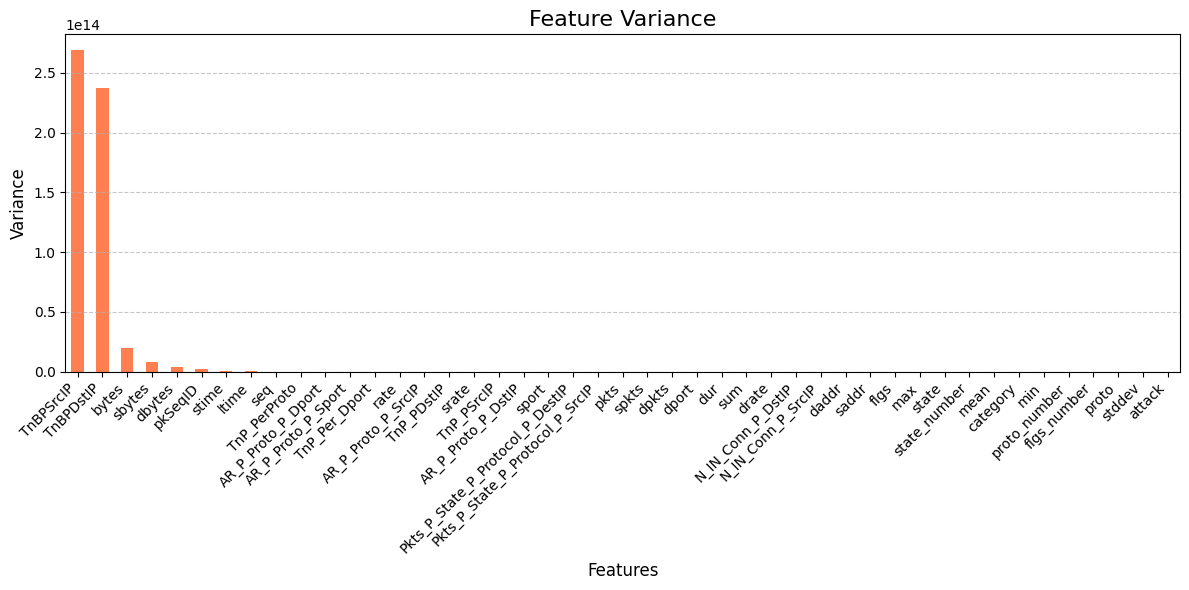

In [122]:
features = balanced_data.drop(columns=['subcategory_encoded'])
variances = features.var()
plt.figure(figsize=(12, 6))
variances.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Feature Variance', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

LOOKING AT THESE WE CAN SEE tHAT THERE ARE TWO COLUMNS THAT HAVE A HIGH AMOUNT OF VARIANCE, ( TnBPSrcIP and TnBPDstIP )

NOW LETS STANDARDIZE THESE TWO FEATURES

step 1: lets import standard scalar

In [123]:
from sklearn.preprocessing import StandardScaler

step 2: lets initialize standard scalar

In [124]:
scaler = StandardScaler()

step 3: now let me define the array of my two features

In [132]:
features=['TnBPSrcIP','TnBPDstIP']

step 4: lets standardize these features

In [133]:
df[features] = scaler.fit_transform(df[features])

step 5: lets display all the statistics

In [136]:
print("All features have been standardized.")
print(df.describe())

All features have been standardized.
            pkSeqID         stime           flgs    flgs_number  \
count  1.010080e+05  1.010080e+05  101008.000000  101008.000000   
mean   1.817106e+06  1.528043e+09       1.814549       1.483981   
std    1.070501e+06  2.792960e+05       2.395077       0.872340   
min    1.000000e+00  1.526344e+09       0.000000       1.000000   
25%    8.982390e+05  1.528085e+09       0.000000       1.000000   
50%    1.803816e+06  1.528096e+09       0.000000       1.000000   
75%    2.739684e+06  1.528099e+09       5.000000       2.000000   
max    3.668424e+06  1.528103e+09       6.000000       7.000000   

               proto   proto_number          saddr          sport  \
count  101008.000000  101008.000000  101008.000000  101008.000000   
mean        3.525770       2.073291       2.507980   25892.714943   
std         0.520748       1.001046       1.198008   14813.993026   
min         0.000000       1.000000       0.000000       0.000000   
25%         3.

step 6: lets calculate the updated variance

In [138]:
updated_variances = df.var()

step 7: lets plot the updated variances again in a bar graph

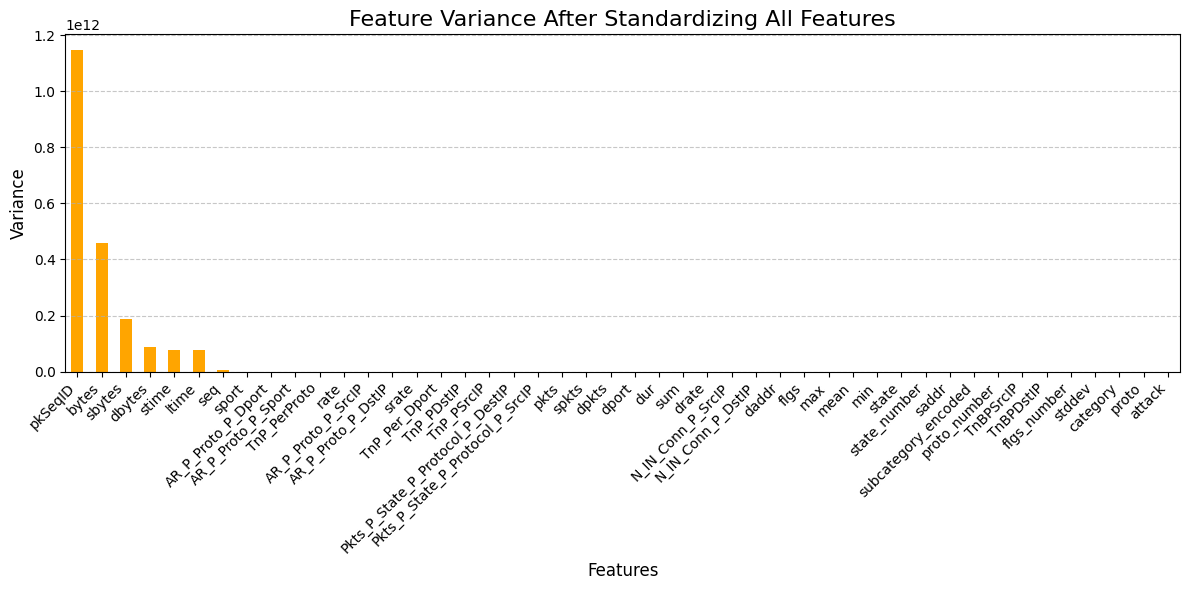

In [139]:
plt.figure(figsize=(12, 6))
updated_variances.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Feature Variance After Standardizing All Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NOW I WANT TO SELECT FEATURES USING FEATURE SELECTION METHOD, FIRST LETS PLOT THE CORRELATION HEAT MAP

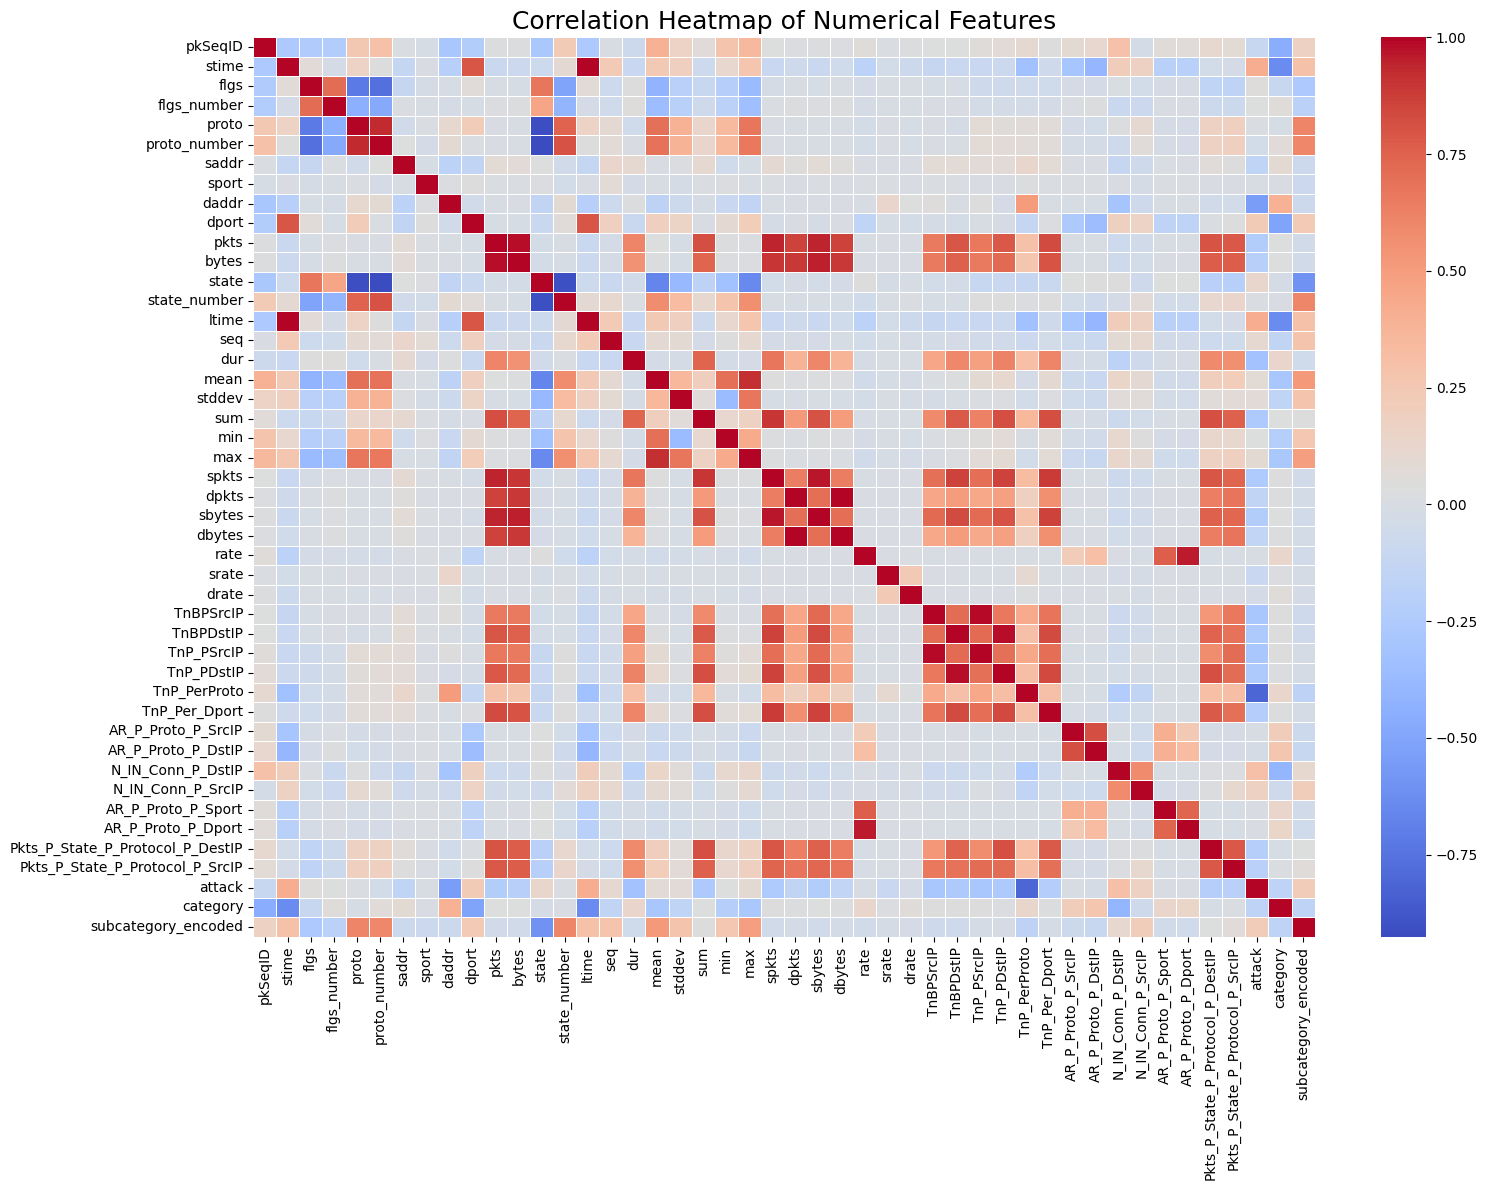

In [141]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()

LETS PERFORM MORE DATA VISULAIZATION TECHNIQUES

lets plot graph for attack count by protocol

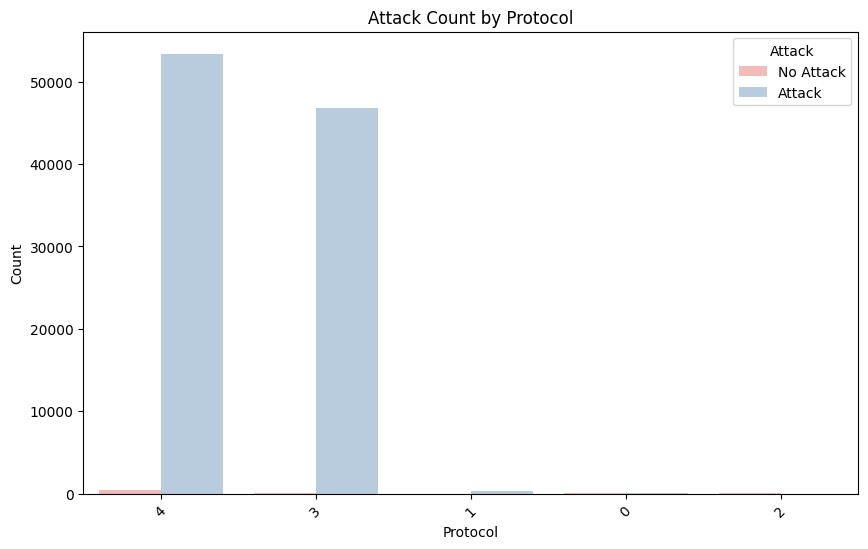

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(x='proto', hue='attack', data=df, palette='Pastel1', order=df['proto'].value_counts().index)
plt.title('Attack Count by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attack', labels=['No Attack', 'Attack'])
plt.show()

lets plot graph for time seiries analysis of subcategory_encoded over time

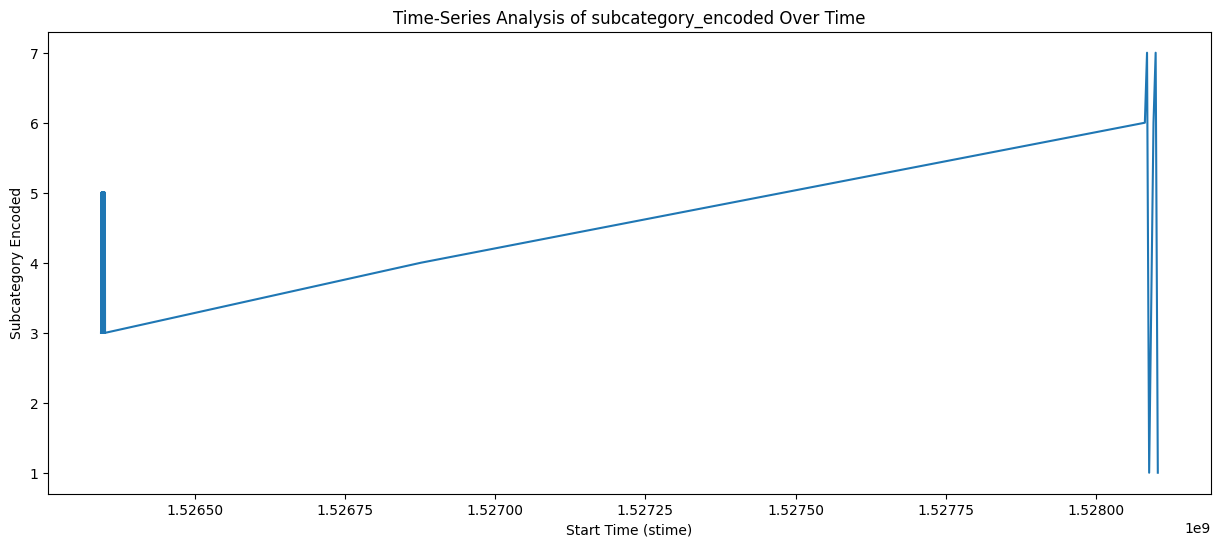

In [151]:
plt.figure(figsize=(15, 6))
df_sorted = df.sort_values(by='stime')
sns.lineplot(x='stime', y='subcategory_encoded', data=df_sorted, ci=None)
plt.title('Time-Series Analysis of subcategory_encoded Over Time')
plt.xlabel('Start Time (stime)')
plt.ylabel('Subcategory Encoded')
plt.show()

NOW I WANT TO PERFORM FEATURE SELECTION ALGORITHMS TO GET THE IMPORTANT FEATURES
I WILL PERFORM THREE FEATURE SELECTION METHODS
1. FILTER
2. WRAPPER
3. EMBEDDED

FIRST LETS PERFORM FEATURE SELECTION

step 1: lets compute correlation with target

In [153]:
correlations = df.corr()['subcategory_encoded'].drop('subcategory_encoded')

step 2: lets sort by absolute correaltion matrix

In [154]:
top_corr_features = correlations.abs().sort_values(ascending=False)

step 3: lets diplay all the feature with correaltion values

In [155]:
print("Top correlated features with target:\n")
print(top_corr_features.head(10))

Top correlated features with target:

proto           0.608883
state           0.606584
state_number    0.604196
proto_number    0.596711
mean            0.516143
max             0.495197
stime           0.298883
ltime           0.298879
seq             0.285146
stddev          0.282463
Name: subcategory_encoded, dtype: float64


LETS PERFORM WRAPPER METHOD NOW
I AM USING FORWARD SELECTION METHOD

step 1: lets import all libraries

In [156]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

step 2: i will perform on only 5000 rows for fast execution

In [157]:
df_sampled = df.sample(n=5000, random_state=42)

step 3: lets prepare x and y

In [158]:
X = df_sampled.select_dtypes(include='number').drop(columns=['subcategory_encoded'])
y = df_sampled['subcategory_encoded']

step 4: initialize model

In [159]:
model = LogisticRegression(max_iter=1000)

step 5: lets perform forward selection

In [160]:
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=10,
    direction='forward',
    cv=StratifiedKFold(n_splits=3),
    n_jobs=-1
)

step 6: lets fit the selector

In [161]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                          estimator=LogisticRegression(max_iter=1000),
                          n_features_to_select=10, n_jobs=-1)

step 7: diplay the selected features

In [162]:
selected_features = X.columns[sfs.get_support()].tolist()
print(" Features selected by Forward Selection:\n", selected_features)

 Features selected by Forward Selection:
 ['bytes', 'state', 'sum', 'sbytes', 'drate', 'TnP_PerProto', 'TnP_Per_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'category']


LETS PERFORM EMBEDDED METHOD NOW, I WILL USE ELASTIC NET REGRESSION

step 1: lets import libraries

In [164]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import numpy as np

step 2: lets scale the features

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

step 3: lets perform elastic net regression method

In [166]:
elastic = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    l1_ratios=[0.9],
    Cs=[0.01, 0.1, 1],
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    n_jobs=-1
)

step 4: lets fit the model

In [167]:
elastic.fit(X_scaled, y)

LogisticRegressionCV(Cs=[0.01, 0.1, 1], cv=5, l1_ratios=[0.9], max_iter=5000,
                     n_jobs=-1, penalty='elasticnet', scoring='accuracy',
                     solver='saga')

step 5: i will have to be sure that only to get the non-zero significant coefficiants only

In [168]:
coef = elastic.coef_[0]
selected_features = X.columns[np.abs(coef) > 0.01]

step 6: now we will display the selected features

In [169]:
print(" Selected features by Elastic Net (filtered):")
print(selected_features.tolist())

 Selected features by Elastic Net (filtered):
['pkSeqID', 'stime', 'flgs', 'flgs_number', 'saddr', 'sport', 'dport', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'stddev', 'max', 'dpkts', 'dbytes', 'TnP_PDstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'category']


NOW LETS TRAIN MY LOGISTIC REGRESSION MODEL

step 1: lets import accuracy library first

In [174]:
from sklearn.metrics import accuracy_score

step 2: lets scale the features first

In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

step 3: lets train the model

In [172]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

step 4: lets predict and evaluate

In [175]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f" Logistic Regression Accuracy: {acc:.4f}")

 Logistic Regression Accuracy: 0.9996


NOW I WILL HAVE TO PERFORM BAGGING ON THIS DATASET, LETS DO IT

step 1: importing libraries

In [176]:
from sklearn.ensemble import BaggingClassifier

step 2: lets define our features

In [183]:
X_full = df[selected_features]
y_full = df['subcategory_encoded']

In [184]:
selected_featuress=['proto','state','state_number','proto_number','mean','max','stime','ltime','seq','stddev']

step 3: now we have to do test train split

In [178]:
_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

In [185]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

step 4: now lets scale the features

In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

step 5: initialize base model and bagging classifier

In [187]:
base_model = LogisticRegression(max_iter=1000)
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

step 6: lets fit the bagging model

In [188]:
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_samples=0.8,
                  n_jobs=-1, random_state=42)

step 7: now we will predict and evaluate

In [190]:
y_pred_bag = bagging_model.predict(X_test_scaled)
bagging_acc = accuracy_score(y_test, y_pred_bag)
print(f" Bagging Accuracy (Logistic Regression): {bagging_acc:.4f}")

 Bagging Accuracy (Logistic Regression): 0.9997


I THINK AFTER THIS I AM DONE WITH MY MICRO PROJECT OF DATA SCIENCE LCA 3